In [1]:
import pandas as pd

In [2]:
data_path = "../project-4-group-6/Resources/Cleaned_Data.csv"

data = pd.read_csv(data_path)

In [3]:
data.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [4]:
data.describe()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
count,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,3.37171,3.898366,7.097075,0.587523,0.412477,0.931903,0.068097,0.962260,...,0.064260,0.065686,0.068141,0.079370,0.093050,0.105336,0.106790,0.097140,0.067174,0.075527
std,0.279766,6.356100,7.95085,7.955235,1.436007,0.492281,0.492281,0.251912,0.251912,0.190567,...,0.245216,0.247733,0.251987,0.270315,0.290503,0.306987,0.308847,0.296149,0.250324,0.264239
min,0.000000,12.020000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.00000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.00000,0.000000,7.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,2.00000,3.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,30.00000,30.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [6]:
X = data.copy()
X.drop("HeartDisease", axis=1, inplace=True)
X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,20.34,0.0,0.0,7.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
y = data["HeartDisease"].ravel()
y[:5]

array([0, 0, 0, 0, 0])

In [8]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
scaler = StandardScaler()

In [10]:
X_scaler = scaler.fit(X_train)

In [11]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
 # Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [13]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [23]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_train, X_train)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_train = accuracy_score(y_train, X_train)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [14]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [15]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [16]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,71241,1911
Actual 1,5833,964


Accuracy Score : 0.9031382506347797
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     73152
           1       0.34      0.14      0.20      6797

    accuracy                           0.90     79949
   macro avg       0.63      0.56      0.57     79949
weighted avg       0.87      0.90      0.88     79949



In [17]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.33589507216675507, 'BMI'),
 (0.1099743503265185, 'SleepTime'),
 (0.07706210663682321, 'PhysicalHealth'),
 (0.06705798339332761, 'MentalHealth'),
 (0.017729704715859263, 'AgeCategory_80 or older'),
 (0.014651163332913752, 'Stroke_No'),
 (0.014524287272250618, 'Stroke_Yes'),
 (0.014159321767826775, 'DiffWalking_Yes'),
 (0.01410282314391085, 'PhysicalActivity_No'),
 (0.013928497099496805, 'PhysicalActivity_Yes'),
 (0.01387001822575528, 'Diabetic_Yes'),
 (0.013502989089502067, 'DiffWalking_No'),
 (0.013460495738847507, 'GenHealth_Fair'),
 (0.013164633027735373, 'AgeCategory_70-74'),
 (0.012991255176931546, 'Race_White'),
 (0.012847367285273189, 'AgeCategory_75-79'),
 (0.012843318960525952, 'GenHealth_Poor'),
 (0.01205417644675408, 'Asthma_Yes'),
 (0.011985681302111325, 'Asthma_No'),
 (0.011673098400777899, 'Diabetic_No'),
 (0.01164235462866316, 'AgeCategory_65-69'),
 (0.01052007446394305, 'AgeCategory_60-64'),
 (0.01025794920777657, 'GenHealth_Good'),
 (0.009413257303557928, 'Smoking_Y

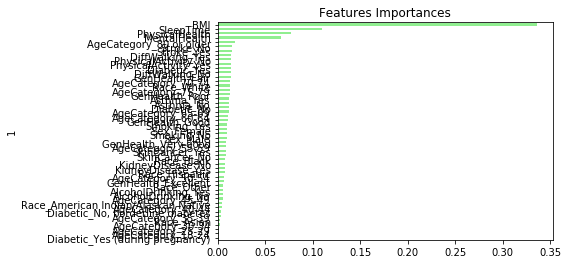

In [18]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [19]:
from sklearn.model_selection import cross_val_score, KFold

In [20]:
k = 5

In [21]:
Kf = KFold(n_splits=k, shuffle=True, random_state=78)
scores = cross_val_score(rf_model, X, y, cv=Kf, scoring="accuracy")

In [22]:
print("Cross-Validation Accuracy: {:.2f}".format(scores.mean()))
print("Cross-Validation Precision: {:.2f}".format(scores.mean()))
print("Cross-Validation Recall: {:.2f}".format(scores.mean()))
print("Cross-Validation F1 Score: {:.2f}".format(scores.mean()))

Cross-Validation Accuracy: 0.90
Cross-Validation Precision: 0.90
Cross-Validation Recall: 0.90
Cross-Validation F1 Score: 0.90
